### Traditional ML Algorithms

Pros: Interpretable, fast to train, great for structured/tabular data.

Limitations:

Struggle with unstructured data like images, audio, text.

Feature engineering is manual and hard.

Don't scale well with high-dimensional, complex data patterns.

### Artifical neural network

An ANN is made up of layers of nodes, often called neurons or units. Each neuron takes some inputs, processes them, and passes an output to the next layer. These networks learn by adjusting the weights of connections between neurons based on the error of predictions.

### Neural Network - Simple Intro

- Inspired by the brain, used for tasks like image recognition and predictions.
- Consists of:
  - Input layer
  - Hidden layer(s)
  - Output layer

### Backpropagation

- Method to learn by adjusting weights.
- Steps:
  1. Forward pass: Compute output and loss.
  2. Backward pass: Calculate gradients using chain rule.
  3. Update weights using gradient descent.

### Formula Highlights

- Neuron: `z = w·x + b`
- Activation: `a = activation(z)`
- Loss: e.g., `(a - y)^2`
- Weight update: `w_new = w - learning_rate × gradient`

wnew = w−η *dL/dw
repeate until convergence {
  w  =  w  – α (𝛛𝐋(𝐰))/𝛛𝐰
}

​L=loss function

Bias allows the activation function to shift horizontally, enabling better alignment with the data.



## Backpropagation (Simple Version)

Input (x) → Hidden layer (z₁ → a₁) → Output layer (z₂ → ŷ)

sigma= activation function

- w1: weights from input to hidden
- w2: weights from hidden to output
- z1 = w1.x and a1 = sigma(z1)
- z2 = w2.a1 and ypred= sigma(z2)

dL/dz1 = (dL/dypred)*(dypred/dz2)* (dz2/da1)*(da1/dz1)

(dL/dypred) = error at output

dL/dz1 = (error at output) * (sigma'(z2)) * w2 *  (sigma'(z1))


error_hidden = erroratoutput * woutput * activationderivative(hidden)

Effectively in  deep neural networks, this formula is applied repeatedly from the output all the way back to the first (earliest) layers.
 
 **error_at_first_layer is proportional to product of k=2 to L (wk * activationderivative(k-1))**
 L= number of outermost layer


 | Activation  | Range of Output | Range of Derivative   |
| ----------- | --------------- | --------------------- |
| **Sigmoid** | (0, 1)          | (0, 0.25)             |
| **Tanh**    | (–1, 1)         | (0, 1), peaks at 0.25 |

Then:
- the product becomes tiny
- early-layer gradients vanish
- early weights stop updating
- network stops learning effectively

### Solution:
- Use ReLU/Leaky ReLU instead of sigmoid/tanh
- Use proper weight initialization (e.g. He/Xavier)
- Add batch normalization
- Use residual connections (ResNets)


## Activation Functions and their derivatives

First of all, why do we need activation functions?
THE ROLE OF ACTIVATION FUNCTIONS IS TO MAKE NEURAL NETWORKS NON-LINEAR !!!
- without the activation function the network is just a linear transformation, which
    is not strong enough to many kinds of data. 
- we could add more parameters to the model instead of using activation functions
    Not a good idea: the training would be slower ... 

1.) linear activation function

2.) sigmoid activation function

3.) tanh activation function

4.) ReLU activation function

5.) leaky ReLU activation function

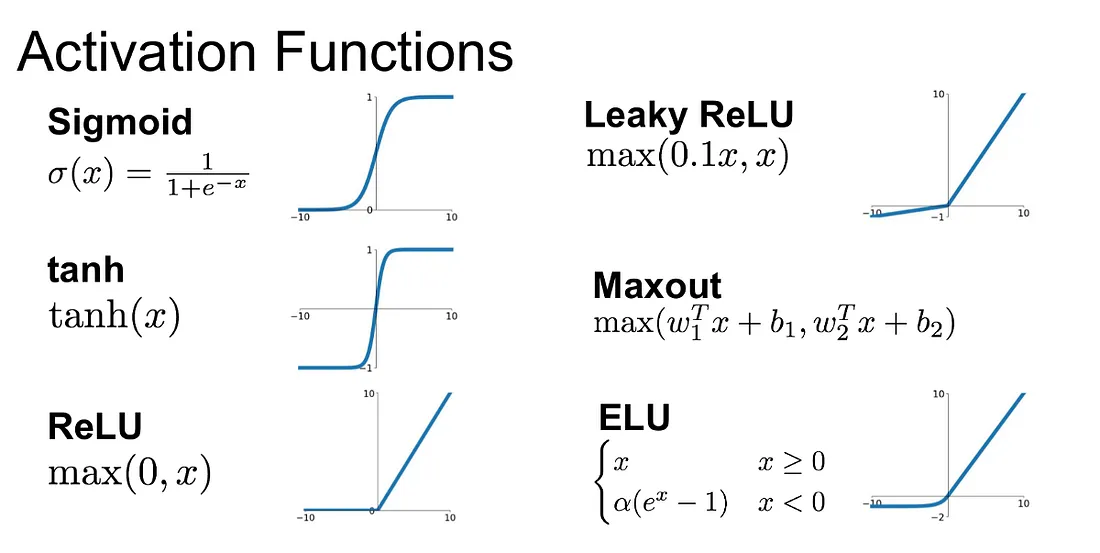


| Name        | Formula                                 | Derivative                                | Use-case / Notes                        |
|-------------|------------------------------------------|--------------------------------------------|------------------------------------------|
| Sigmoid     | 1 / (1 + e^-x)                           | f(x)(1 - f(x))                              | Binary output; vanishes at extremes      |
| Tanh        | (e^x - e^-x)/(e^x + e^-x)                | 1 - tanh²(x)                                | Better than sigmoid; still vanishes      |
| ReLU        | max(0, x)                                | 1 if x > 0 else 0                           | Most common; sparse activation           |
| Leaky ReLU  | x if x > 0 else αx (e.g., α=0.01)        | 1 if x > 0 else α                           | Fixes dying neurons                      |



Softmax activation function:

ai=e^zi/sum (e^zi) probability between 0 and 1

##  Loss functions

Mean Squared Error Loss:

Cross Entropy measures the difference between 2 probability distributions, the labels and the predictions, loss is given by - sum i=1 to n (yi(log(yhat i)))

### Batches, Normalization, Epochs

- Batch: A subset of the original data is called a batch(mini-batch) containing 32-256 items. The mini batch gradient descent uses a subset of the original dataset to calculate the loss and update the weights. We shuffle the dataset and randomly select N items for each batch.


- Iteration: One iteration is when the algorithm considers all the sample in a batch containing 32-256 items. After every iteration the loss is computed and the weights are updated.

- Epoch: One complete pass through the entire training dataset during the training process.

Min Max Normalization can be performed when features are within a similar scale. But if theere are several outliers in the dataset then the normalized values can be distorted.

#  Gradient Descent vs Stochastic Gradient Descent vs Mini-Batch Gradient Descent

This markdown explains the difference between Gradient Descent (GD), Stochastic Gradient Descent (SGD), and Mini-Batch Gradient Descent using **simple numbers and step-by-step manual calculations**.

---

##  Problem Setup

We want to fit a linear model:

    y = w * x + b

We'll minimize the **Mean Squared Error (MSE)**:

    Loss = (1/n) * sum((y_i - (w * x_i + b))^2)

### Sample Dataset (n = 4)

| x | y |
|---|---|
| 1 | 2 |
| 2 | 4 |
| 3 | 6 |
| 4 | 8 |

Clearly, the true function is:

    y = 2 * x  => w = 2, b = 0

We'll start with:
- Initial weights: w = 0, b = 0
- Learning rate: 0.1

---

## 1. Batch Gradient Descent (GD)

Uses **all samples together** to compute gradient.

### Step 1: Compute predictions, errors, and gradients

Current w = 0, b = 0

| x | y | predicted y = w*x + b | error = y - y_hat | x * error |
|---|---|------------------------|-------------------|------------|
| 1 | 2 | 0                      | 2                 | 2          |
| 2 | 4 | 0                      | 4                 | 8          |
| 3 | 6 | 0                      | 6                 | 18         |
| 4 | 8 | 0                      | 8                 | 32         |

Sum of errors = 2 + 4 + 6 + 8 = 20  
Sum of x * errors = 2 + 8 + 18 + 32 = 60  
n = 4

### Step 2: Compute gradients

    dL/dw = (-2/n) * sum(x * error) = (-2/4) * 60 = -30  
    dL/db = (-2/n) * sum(error) = (-2/4) * 20 = -10

### Step 3: Update weights

    w = w - learning_rate * dL/dw = 0 - 0.1 * (-30) = 3.0  
    b = b - learning_rate * dL/db = 0 - 0.1 * (-10) = 1.0

 After 1 step: w = 3.0, b = 1.0

---

## 2. Stochastic Gradient Descent (SGD)

Uses **only one data point at a time**.

### Step-by-step for first 2 samples:

---

### Sample 1: (x = 1, y = 2)

- w = 0, b = 0
- prediction = 0
- error = 2

    dL/dw = -2 * x * error = -2 * 1 * 2 = -4  
    dL/db = -2 * error = -4

Update:

    w = 0 + 0.1 * 4 = 0.4  
    b = 0 + 0.1 * 4 = 0.4

---

### Sample 2: (x = 2, y = 4)

- prediction = 0.4 * 2 + 0.4 = 1.2  
- error = 4 - 1.2 = 2.8

    dL/dw = -2 * 2 * 2.8 = -11.2  
    dL/db = -2 * 2.8 = -5.6

Update:

    w = 0.4 + 0.1 * 11.2 = 1.52  
    b = 0.4 + 0.1 * 5.6 = 0.96

 After 2 samples: w = 1.52, b = 0.96 (faster but less stable)

---

##  3. Mini-Batch Gradient Descent

Uses **small subsets of data** (e.g., 2 samples per batch).

### Mini-batch 1: Samples 1 & 2

| x | y | y_hat | error | x * error |
|---|---|--------|--------|------------|
| 1 | 2 | 0      | 2      | 2          |
| 2 | 4 | 0      | 4      | 8          |

Sum of errors = 6  
Sum of x * error = 10  
batch size = 2

    dL/dw = (-2/2) * 10 = -10  
    dL/db = (-2/2) * 6 = -6

Update:

    w = 0 + 0.1 * 10 = 1.0  
    b = 0 + 0.1 * 6 = 0.6

 After batch: w = 1.0, b = 0.6

---

## Summary Comparison

| Method              | Data Used per Step  | Speed       | Stability      | Memory      |
|---------------------|----------------------|-------------|----------------|-------------|
| Batch GD            | All samples          | Slow        | Very Stable    | High        |
| SGD                 | One sample           | Very Fast   | Noisy/Unstable | Low         |
| Mini-Batch GD       | Small subset (e.g., 2)| Balanced    | Moderately stable | Medium   |

---

## When to Use What?

- **Batch GD**: Small datasets, maximum stability
- **SGD**: Real-time or large datasets, faster updates
- **Mini-batch GD**: Most commonly used in deep learning (balance of speed and accuracy)

---


# Dropout Regularization in Neural Networks

Dropout is a **regularization technique** used in neural networks to prevent **overfitting** during training. It works by **randomly "dropping out" (setting to zero)** a fraction of the neurons in a layer during each training iteration.


##  Why Use Dropout?

Neural networks with many layers and parameters are prone to **overfitting** — they memorize the training data instead of generalizing well to unseen data.

Dropout forces the network to **not rely too much on any individual neuron** and encourages it to learn more **robust features**.



##  How Does Dropout Work?

### During Training:
- Each neuron (except output neurons) has a **probability `p`** of being **dropped (ignored)**.
- The dropped neurons do **not contribute** to forward or backward pass.
- Example: If `p = 0.5`, then half the neurons are randomly turned off for each training sample.

### During Inference (Prediction):
- **No dropout** is applied.
- The weights are **scaled by `1 - p`** to match the expected output.



##  Dropout Illustration

Suppose we have a hidden layer:

    [N1] ---\
    [N2] ----> (to next layer)
    [N3] ---/

With dropout `p = 0.5`, one possible training iteration might look like:

    [ X ] ---\       ← N1 is dropped
    [N2] ---->       ← N2 is kept
    [ X ] ---/       ← N3 is dropped

Only N2 contributes to the output and gradient updates in this iteration.

---

## Example with Numbers

Let’s say we have:

- A layer output: [0.8, 0.5, 0.3]
- Dropout rate: 0.5
- Randomly drop 2nd neuron

**During Training**:

    Input:      [0.8, 0.5, 0.3]
    Drop mask:  [1, 0, 1]  ← 2nd neuron dropped
    Result:     [0.8, 0.0, 0.3]

**During Inference**:

Instead of applying dropout, scale the neurons:

    Output: [0.8 * 0.5, 0.5 * 0.5, 0.3 * 0.5] = [0.4, 0.25, 0.15]

This ensures the output distribution stays consistent.

---

## Benefits of Dropout

- Prevents overfitting
- Encourages redundancy — no single neuron becomes too important
- Acts like **model ensembling** (many smaller networks trained implicitly)

---

##  When Not to Use

- On very small datasets (can underfit)
- On input or output layers (usually)

##  Typical Dropout Rates

| Layer Type      | Typical Rate (p) |
|------------------|------------------|
| Input Layer      | 0.1 - 0.2        |
| Hidden Layers    | 0.5              |
| Output Layer     | 0                |




# Modelling XOR NN

The XOR problem is non-linearly separable because you cannot draw a straight line that separates the two classes of the XOR function in a 2D space.
| Input x1 | Input x2 | Output (x1 XOR x2) |
| -------- | -------- | ------------------ |
| 0        | 0        | 0                  |
| 0        | 1        | 1                  |
| 1        | 0        | 1                  |
| 1        | 1        | 0                  |

      x2 ↑
         |
     1   |    ● (0,1) → 1       ● (1,1) → 0
         |
     0   |    ● (0,0) → 0       ● (1,0) → 1
         |
         +------------------------→ x1
              0          1

XOR showed the limits of linear models.

In 1969, Minsky and Papert used XOR to argue that single-layer perceptrons are insufficient for many tasks.

This led to the development of multi-layer neural networks (e.g., MLPs) which can learn non-linear decision boundaries.

So this is why we shold use activation functions, so that it introduces non linearity 

In [2]:
pip install keras tensorflow

  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
  Using cached charset_normalizer-3.4.2-cp312-cp312-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached MarkupSafe-3.0.2-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.4 MB 3.3 MB/s eta 0:00:01
   ---- ----------------------------------- 0.1/1.4 MB 2.1 MB/s eta 0:00:01
   ---

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [2]:
training_data= np.array([[0,0],[0,1],[1,0],[1,1]],dtype='float32')
target_data= np.array([[0],[1],[1],[0]],dtype='float32')


In [5]:
model=Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))  # Hidden layer with 2 neurons
model.add(Dense(16, input_dim=16, activation='relu'))  # Hidden layer with 2 neurons
model.add(Dense(16, input_dim=16, activation='relu'))  # Hidden layer with 2 neurons
model.add(Dense(16, input_dim=16, activation='relu'))  # Hidden layer with 2 neurons
model.add(Dense(16, input_dim=16, activation='relu'))  # Hidden layer with 2 neurons
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(training_data, target_data, epochs=200, batch_size=4, verbose=1)
predictions = model.predict(training_data)
print(predictions)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6677
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.2500 - loss: 0.6653
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5000 - loss: 0.6626
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5000 - loss: 0.6600
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7500 - loss: 0.6574
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7500 - loss: 0.6549
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.7500 - loss: 0.6522
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7500 - loss: 0.6500
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7500 - loss: 0.6477
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.7500 - loss: 0.6452
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7500 - loss: 0.6429
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7500 - loss

[[1.1647698e-02 ~ 0]
 [9.9903744e-01 ~ 1]
 [9.9122655e-01 ~ 1]
 [7.3864392e-04 ~ 0]]

### MULTI CLASS CLASSIFICATION

In [6]:
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data
y = dataset.target


In [7]:
features = dataset.data
target = dataset.target


In [8]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Usually activation functions transform the data in the range (0,1)